# Reduccion de Dimensionalidad
El Análisis de Componentes Principales (PCA) es una técnica estadística ampliamente utilizada en ciencia de datos y aprendizaje automático para la reducción de dimensionalidad. Su objetivo es transformar un conjunto de variables posiblemente correlacionadas en un nuevo conjunto de variables no correlacionadas llamadas componentes principales.

Cada componente principal es una combinación lineal de las variables originales, construida de forma que capture la mayor varianza posible de los datos. El primer componente (PC1) explica la mayor parte de la variabilidad; el segundo componente (PC2) explica la mayor parte de la variabilidad restante, y así sucesivamente.

**¿Por qué usar PCA?**
> Reducir el número de dimensiones sin perder demasiada información.
> 
> Eliminar colinealidad entre variables.
> 
> Visualizar datos complejos en 2D o 3D.
> 
> Mejorar el rendimiento de modelos predictivos al reducir el ruido.

**¿Cómo funciona PCA?**

> Escala los datos (muy recomendable).
> 
> Calcula la matriz de covarianza.
>  
> Extrae los autovalores y autovectores (direcciones principales).
> 
> Ordena los componentes por varianza explicada.
> 
> Proyecta los datos originales sobre los nuevos ejes (componentes).

**Aplicaciones típicas:**
> Reconocimiento de patrones.
> 
> Visualización de datos multivariados.
> 
> Preprocesamiento para modelos de machine learning.
> 
> Compresión de datos.

| **Aspecto**               |                                                **Descripción**                                                                    |
| ------------------------- | --------------------------------------------------------------------------------------------------------------------------------- |
| **¿Qué es PCA?**          | Método de reducción de dimensionalidad que transforma variables correlacionadas en un conjunto de componentes no correlacionados. |
| **Objetivo principal**    | Capturar la mayor varianza de los datos en menos dimensiones.                                                                     |
| **Entrada**               | Matriz de datos numéricos (features).                                                                                             |
| **Salida**                | Componentes principales (PC1, PC2, ...), que son combinaciones lineales de las variables originales.                              |
| **Requiere escalamiento** | Sí, generalmente usando `StandardScaler` o `MinMaxScaler` antes de aplicar PCA.                                                   |
| **Beneficios**            | Simplifica visualización, mejora rendimiento de modelos, elimina colinealidad.                                                    |
| **Varianza explicada**    | Mide cuánta información conserva cada componente (se puede graficar).                                                             |
| **Aplicaciones comunes**  | Visualización, compresión, eliminación de ruido, análisis exploratorio, preprocesamiento para ML.                                 |
| **Limitación**            | Solo capta relaciones lineales; puede perder interpretabilidad de variables.                                                      |


In [40]:
# Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Cargar el dataset Iris
iris = sns.load_dataset("iris")

# Separar características y etiqueta
X = iris.drop("species", axis=1)
y = iris["species"]

In [41]:
# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [43]:
# Crear nuevo DataFrame con los componentes
df_pca = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
df_pca["species"] = y

In [44]:
# Varianza explicada por cada componente principal
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)

# Varianza acumulada
print("\nVarianza acumulada:")
print(pca.explained_variance_ratio_.cumsum())

# Componentes del PCA (cargas principales)
print("\nCargas de las variables originales (componentes):")
print(pd.DataFrame(pca.components_, columns=X.columns, index=["PC1", "PC2"]))

Varianza explicada por cada componente:
[0.72962445 0.22850762]

Varianza acumulada:
[0.72962445 0.95813207]

Cargas de las variables originales (componentes):
     sepal_length  sepal_width  petal_length  petal_width
PC1      0.521066    -0.269347      0.580413     0.564857
PC2      0.377418     0.923296      0.024492     0.066942


Varianza explicada: PC1 captura el ~72.9 % de la varianza y PC2 el ~22.8 %, lo que significa que juntas capturan ~95.7 %.

Cargas: indican cuánto contribuye cada variable original a los componentes principales. Valores más altos (positivos o negativos) = mayor influencia.

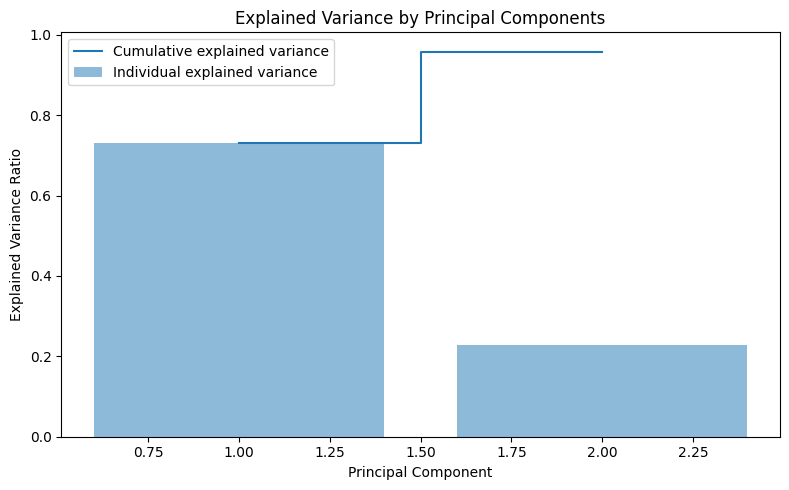

In [45]:

# Varianza explicada
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)
# Graficar
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cum_var)+1), cum_var, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

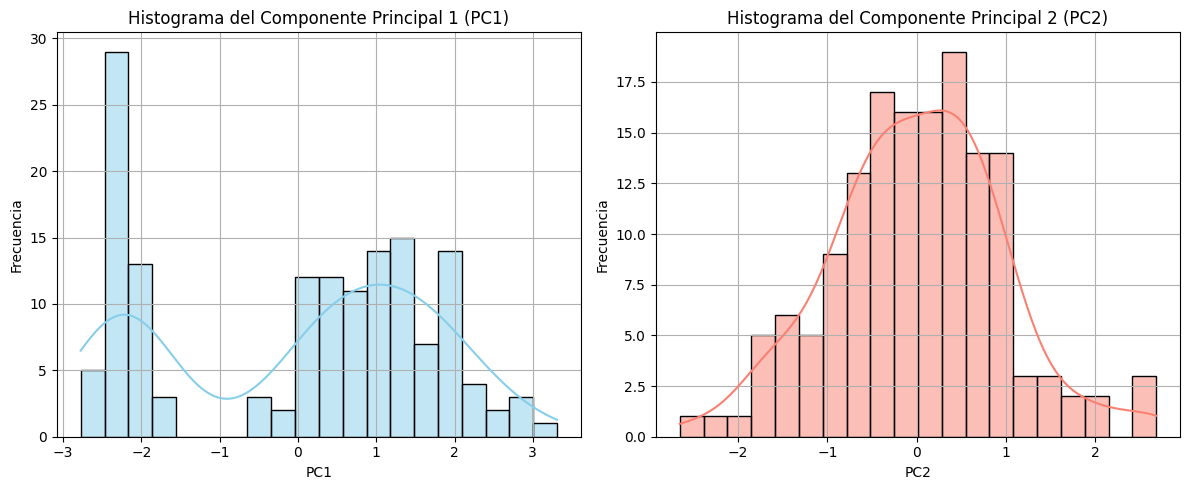

In [46]:
# Histogramas de los componentes principales
plt.figure(figsize=(12, 5))

# Histograma de PC1
plt.subplot(1, 2, 1)
sns.histplot(df_pca["PC1"], kde=True, bins=20, color="skyblue")
plt.title("Histograma del Componente Principal 1 (PC1)")
plt.xlabel("PC1")
plt.ylabel("Frecuencia")
plt.grid(True)

# Histograma de PC2
plt.subplot(1, 2, 2)
sns.histplot(df_pca["PC2"], kde=True, bins=20, color="salmon")
plt.title("Histograma del Componente Principal 2 (PC2)")
plt.xlabel("PC2")
plt.ylabel("Frecuencia")
plt.grid(True)

plt.tight_layout()
plt.show()

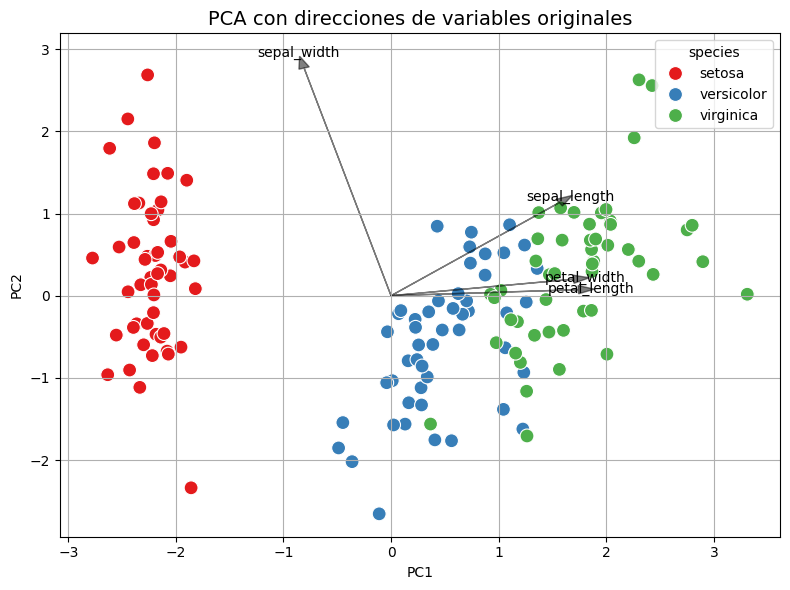

In [47]:
# Graficar vectores de las variables originales (loadings)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="species", palette="Set1", s=100)

# Añadir vectores
for i, var in enumerate(X.columns):
    plt.arrow(0, 0,
              pca.components_[0, i]*3,  # escalar para visualizar mejor
              pca.components_[1, i]*3,
              color='black', alpha=0.5, head_width=0.1)
    plt.text(pca.components_[0, i]*3.2,
             pca.components_[1, i]*3.2,
             var, color='black', ha='center', va='center', fontsize=10)

plt.title("PCA con direcciones de variables originales", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()

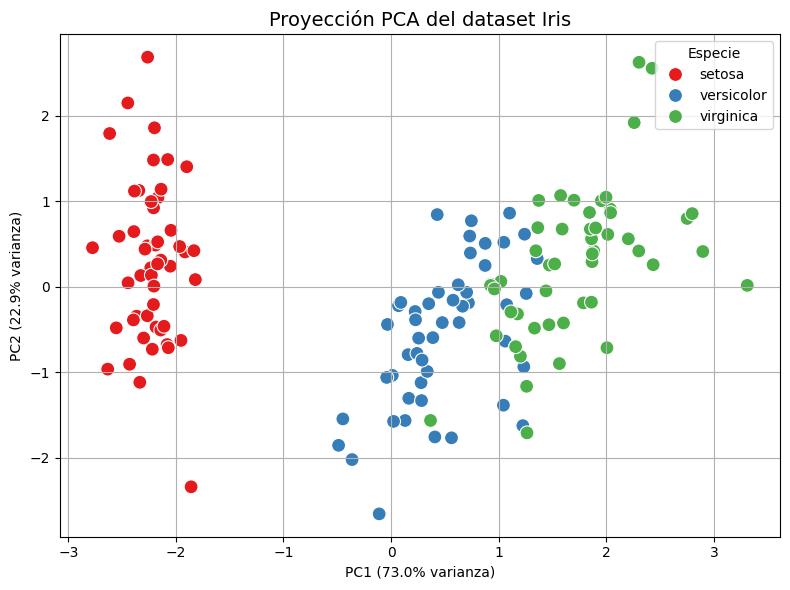

In [48]:
# Graficar la proyección
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="species", palette="Set1", s=100)
plt.title("Proyección PCA del dataset Iris", fontsize=14)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% varianza)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% varianza)")
plt.grid(True)
plt.legend(title="Especie")
plt.tight_layout()
plt.show()

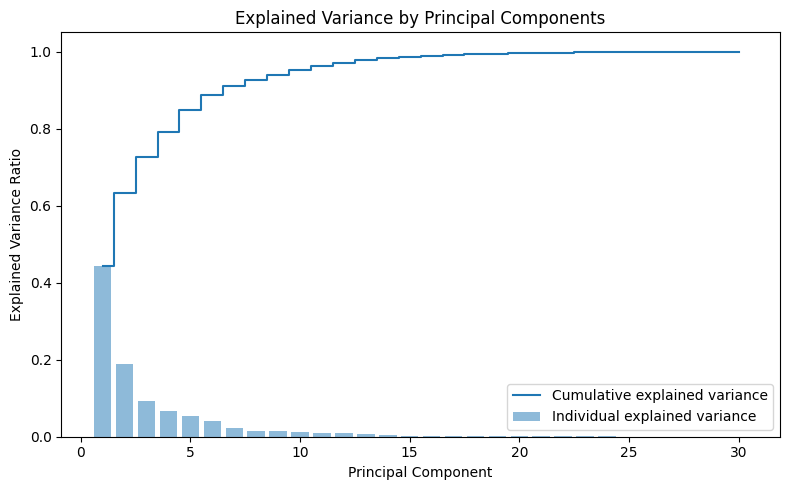

In [49]:
from sklearn.datasets import load_breast_cancer

# Ejemplo con dataset real (puedes usar tus propios datos escalados)
data = load_breast_cancer()
X = data.data
X_scaled = StandardScaler().fit_transform(X)

# PCA completo
pcaLBC = PCA()
X_pca = pcaLBC.fit_transform(X_scaled)

# Varianza explicada
explained_var = pcaLBC.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

# Graficar
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cum_var)+1), cum_var, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [50]:
# Varianza explicada por cada componente principal
print("Varianza explicada por cada componente:")
print(pcaLBC.explained_variance_ratio_)

# Varianza acumulada
print("\nVarianza acumulada:")
print(pcaLBC.explained_variance_ratio_.cumsum())

Varianza explicada por cada componente:
[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]

Varianza acumulada:
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


In [51]:
column_names = data.feature_names  # O una lista como ['var1', 'var2', ..., 'varN']
pca_components_df = pd.DataFrame(
    pcaLBC.components_,
    columns=column_names,
    index=[f'PC{i+1}' for i in range(pcaLBC.n_components_)]
)

# Mostrar como tabla
print("📊 Cargas principales (componentes de PCA):")
display(pca_components_df.round(4))  # redondear para mayor legibilidad

📊 Cargas principales (componentes de PCA):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.2189,0.1037,0.2275,0.2210,0.1426,0.2393,0.2584,0.2609,0.1382,0.0644,...,0.2280,0.1045,0.2366,0.2249,0.1280,0.2101,0.2288,0.2509,0.1229,0.1318
PC2,-0.2339,-0.0597,-0.2152,-0.2311,0.1861,0.1519,0.0602,-0.0348,0.1903,0.3666,...,-0.2199,-0.0455,-0.1999,-0.2194,0.1723,0.1436,0.0980,-0.0083,0.1419,0.2753
PC3,-0.0085,0.0645,-0.0093,0.0287,-0.1043,-0.0741,0.0027,-0.0256,-0.0402,-0.0226,...,-0.0475,-0.0423,-0.0485,-0.0119,-0.2598,-0.2361,-0.1731,-0.1703,-0.2713,-0.2328
PC4,-0.0414,0.6031,-0.0420,-0.0534,-0.1594,-0.0318,-0.0191,-0.0653,-0.0671,-0.0486,...,-0.0154,0.6328,-0.0138,-0.0259,-0.0177,0.0913,0.0740,-0.0060,0.0363,0.0771
PC5,-0.0378,0.0495,-0.0374,-0.0103,0.3651,-0.0117,-0.0864,0.0439,0.3059,0.0444,...,0.0044,0.0929,-0.0075,0.0274,0.3244,-0.1218,-0.1885,-0.0433,0.2446,-0.0944
PC6,0.0187,-0.0322,0.0173,-0.0019,-0.2864,-0.0141,-0.0093,-0.0520,0.3565,-0.1194,...,-0.0003,-0.0500,0.0085,-0.0252,-0.3693,0.0477,0.0284,-0.0309,0.4989,-0.0802
PC7,-0.1241,0.0114,-0.1145,-0.0517,-0.1407,0.0309,-0.1075,-0.1505,-0.0939,0.2958,...,-0.0097,0.0099,-0.0004,0.0678,-0.1088,0.1405,-0.0605,-0.1680,-0.0185,0.3747
PC8,-0.0075,0.1307,-0.0187,0.0347,-0.2890,-0.1514,-0.0728,-0.1523,-0.2315,-0.1771,...,0.0426,0.0363,0.0306,0.0794,0.2059,0.0840,0.0725,-0.0362,0.2282,0.0484
PC9,-0.2231,0.1127,-0.2237,-0.1956,0.0064,-0.1678,0.0406,-0.1120,0.2560,-0.1237,...,-0.1121,0.1033,-0.1096,-0.0807,0.1123,-0.1007,0.1619,0.0605,0.0646,-0.1342
PC10,0.0955,0.2409,0.0864,0.0750,-0.0693,0.0129,-0.1356,0.0081,0.5721,0.0811,...,0.0774,0.0296,0.0505,0.0699,-0.1283,-0.1721,-0.3116,-0.0766,-0.0296,0.0126
